<a href="https://colab.research.google.com/github/jamespan1118/Xenopus_signal_processing/blob/main/Female_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective: Show that female pitch doesn’t differ significantly across Xenopus species


In [61]:
import librosa
import os
import numpy as np
import seaborn as sns
from librosa import display
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter1d
from scipy.fft import rfft, rfftfreq

In [161]:
def showFemalePitch(species_name):
  i = 1
  color = ['royalblue','navy','blue','cornflowerblue','slateblue','slateblue']
  plt.figure(figsize=(10,7))
  for filename in os.listdir('/content/'):
    if filename.startswith(species_name): 
        samples, sampling_rate = librosa.load('/content/'+filename,sr=44100)
        yf = abs(rfft(samples))
        yf_normalized = yf/np.max(yf)
        envelope = gaussian_filter1d(yf_normalized,sigma=50)
        xf = rfftfreq(len(samples), 1 / sampling_rate)
        #plt.plot(xf,yf_normalized,color = color[i-1], label=species_name+str(i),linewidth=2)
        plt.plot(xf,envelope,color = color[i-1], label=species_name+str(i),linewidth=2)
        plt.xlim(0,5000)
        plt.ylabel("Relative Intensity",labelpad=10,fontsize=14)
        plt.xlabel("Frequency (Hz)",labelpad=10,fontsize=14)
        plt.legend(prop={'size': 16})
        i=i+1

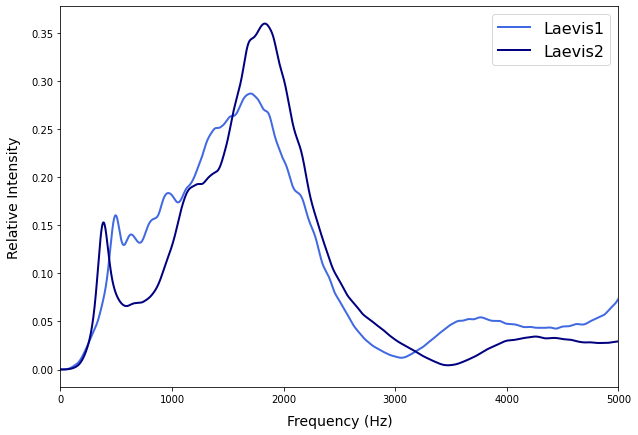

In [163]:
showFemalePitch('Laevis')

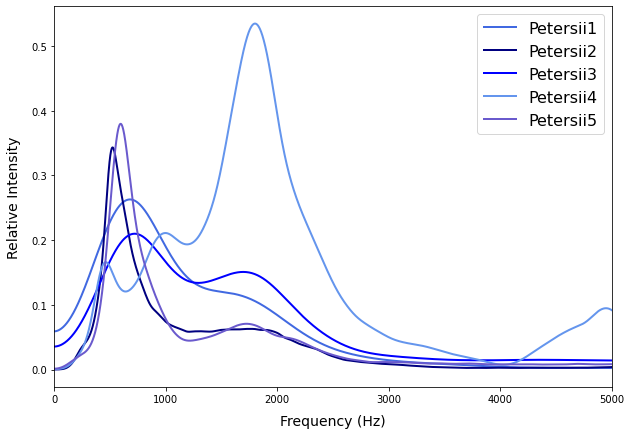

In [162]:
showFemalePitch('Petersii')

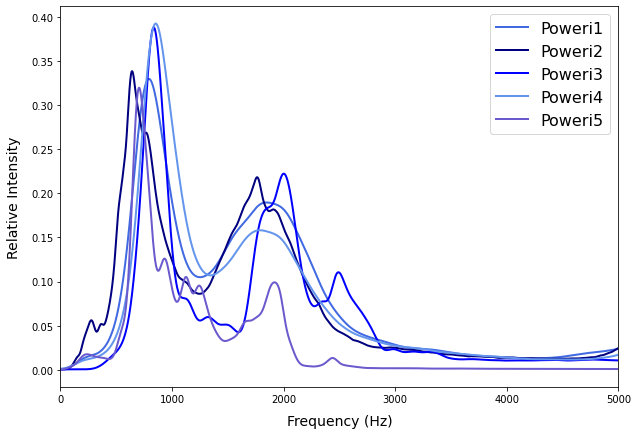

In [148]:
showFemalePitch('Poweri')

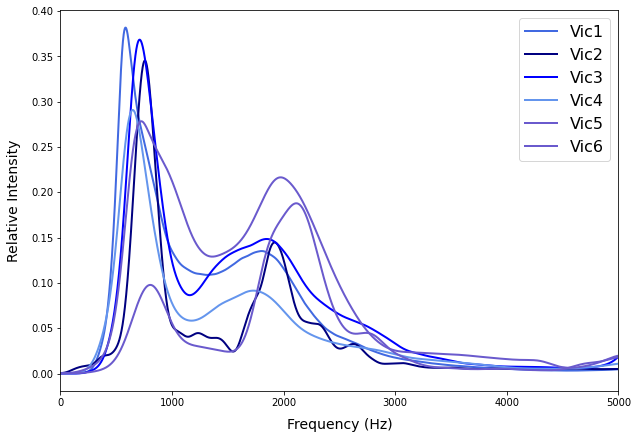

In [149]:
showFemalePitch('Vic')